<a href="https://colab.research.google.com/github/VivekanandaMudelli/hand_drawn_sketch_recognition/blob/main/KNN(Pca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_id = "1QfzguI680h2Od7VXoPTypVr2h-DWwvkk"

# Construct the direct download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "data.csv"  # Change filename as needed
gdown.download(download_url, output, quiet=False)

# Read the CSV file
data = pd.read_csv(output)
data = data.dropna()

X = data.drop(data.columns[0],axis = 1).drop(columns = ['encoded_part','extracted_part'])
y = data['encoded_part']

print(X.shape)
print(y.shape)

Downloading...
From (original): https://drive.google.com/uc?id=1QfzguI680h2Od7VXoPTypVr2h-DWwvkk
From (redirected): https://drive.google.com/uc?id=1QfzguI680h2Od7VXoPTypVr2h-DWwvkk&confirm=t&uuid=ae12589c-b761-4c9f-9a87-a311d21e0d95
To: /content/data.csv
100%|██████████| 634M/634M [00:11<00:00, 57.5MB/s]


(16000, 2048)
(16000,)


In [3]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std.replace(0,1e-10)

In [4]:
# Importing PCA
from sklearn.decomposition import PCA

# Taking top 50 dimensions
pca = PCA(n_components=500)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create the dataframe
df = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(500)])
print(df)

             PC1        PC2        PC3        PC4        PC5        PC6  \
0     -17.389299  11.745196  -9.281998   7.451107   0.483165   0.587576   
1       9.458580  -3.565562 -15.879472  -7.899002  -6.920963  -1.911217   
2     -12.691148   9.079129  -3.546838   4.815350   4.587624   0.938280   
3      -1.723694   5.647300 -15.946122   0.800391   2.665475  -0.919261   
4     -23.614402  10.203870  -5.219199  -5.574987  -8.176104  -1.130938   
...          ...        ...        ...        ...        ...        ...   
15995  29.342983  19.425747  15.814522  -0.653214 -18.198542   2.702877   
15996  26.624242  21.693238   9.062562   3.554492 -12.339963   9.148073   
15997  33.634545  24.298709  14.445170   2.329211 -11.543452  11.711542   
15998  10.408893  10.138322  -0.224529  16.177245   8.627013  -6.234961   
15999  35.803129  16.953130  11.977682   5.984244 -11.204154   5.809444   

             PC7       PC8       PC9      PC10  ...     PC491     PC492  \
0      -3.533000 -3.2475

In [5]:
df['label'] = y

In [6]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500,label
0,-17.389299,11.745196,-9.281998,7.451107,0.483165,0.587576,-3.533000,-3.247567,-2.294448,3.332855,...,0.142173,0.094989,-0.287308,0.024778,-0.262594,-0.093914,-0.120722,-0.206629,0.246922,241
1,9.458580,-3.565562,-15.879472,-7.899002,-6.920963,-1.911217,-13.311302,5.818694,-9.637172,-4.656986,...,-0.104582,-0.336660,-0.367487,-1.040182,0.297184,0.287030,-0.502451,-0.961830,-0.286171,241
2,-12.691148,9.079129,-3.546838,4.815350,4.587624,0.938280,0.348404,1.511344,3.721423,8.011022,...,0.394885,-0.102168,-0.121571,-0.008671,0.324270,0.722204,-0.271515,-0.314670,0.577724,241
3,-1.723694,5.647300,-15.946122,0.800391,2.665475,-0.919261,0.980914,0.443679,-6.240863,6.819922,...,0.323136,0.249014,-0.004074,0.509884,0.475516,0.441743,-0.162249,-0.492463,-0.258162,241
4,-23.614402,10.203870,-5.219199,-5.574987,-8.176104,-1.130938,-4.500553,3.977463,-2.206524,4.687892,...,-0.081905,0.343461,0.115338,-0.145028,0.321692,-0.068468,0.282744,-0.250762,0.128435,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,29.342983,19.425747,15.814522,-0.653214,-18.198542,2.702877,8.602372,-4.458889,0.692144,0.679683,...,0.354160,0.646979,-0.441881,0.257066,-0.042807,0.234197,-0.175629,-0.429834,-0.120178,4
15996,26.624242,21.693238,9.062562,3.554492,-12.339963,9.148073,9.867731,-0.169770,-1.071300,-5.081546,...,0.822704,0.586931,0.215410,0.755482,0.539324,-0.267771,0.115866,0.083214,-0.270425,4
15997,33.634545,24.298709,14.445170,2.329211,-11.543452,11.711542,16.615489,0.850606,1.668582,-8.371907,...,0.198822,0.252665,-0.004988,0.172856,0.328687,0.479874,-0.164714,-0.446075,0.435762,4
15998,10.408893,10.138322,-0.224529,16.177245,8.627013,-6.234961,0.560612,-3.879498,7.310576,4.780600,...,0.314407,-0.158461,-1.117211,-0.252162,-0.204173,0.373000,0.309334,-0.009754,-0.781434,4


In [7]:
def distance(x,y):
  return np.linalg.norm(x-y)

In [8]:
def k_nearest_neighbors(p, points, k):
    dist = [distance(p,p1) for p1 in points]
    neighborId = np.argsort(dist)
    neighbor = [points[i] for i in neighborId[:k]]

    Knn = [neighbor,neighborId[:k]]
    return Knn

In [9]:
import statistics as st

def knn_predict(X_train, y_train, testPoint, k):
  a,b = k_nearest_neighbors(testPoint,X_train,k)# a maps to the list of points and b maps to the list of indices
  k_labels = [y_train[i] for i in b] #list of labels for the k nearest neighbors
  return st.mode(k_labels)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

X_new = df.drop('label', axis=1)
y_new = df['label']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, train_size=0.85, random_state=42)
X_train=X_train.values
y_train=y_train.values
X_val=X_val.values
y_val=y_val.values

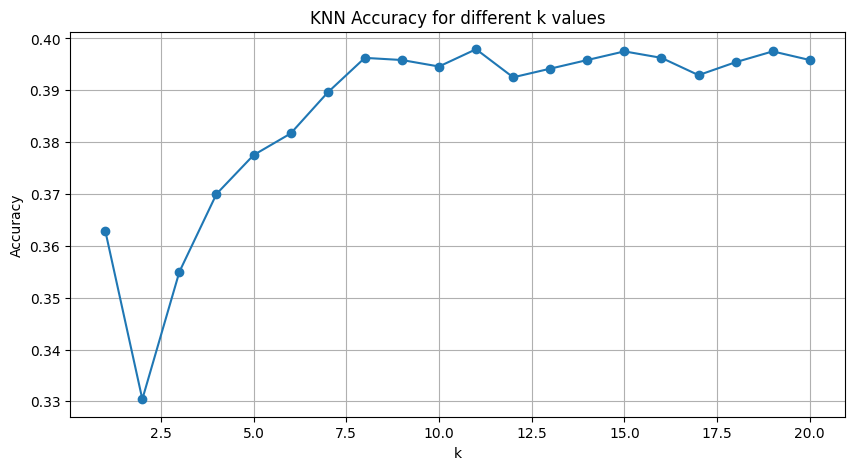

In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy for different k values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [13]:
max_accuracy = max(accuracies)
max_k = k_values[accuracies.index(max_accuracy)]
max_k

11

In [14]:
k= max_k
predictions=[]
for testPoint in tqdm(X_val, desc="Predicting", unit="sample"):
    predictions.append(knn_predict(X_train, y_train, testPoint, k))

Predicting: 100%|██████████| 2400/2400 [02:58<00:00, 13.41sample/s]


In [15]:
accuracy = accuracy_score(y_val, predictions)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 41.54%
